# Exercise 1 - NYC bike-sharing data

| Name | Surname | ID Number |
|------|---------|---------------------|
| Lorenzo | Calandra Buonaura | 2107761 |

The repository https://drive.google.com/drive/folders/1NESuaJ5yGIrAli1TgrpnK5hnoxGsMi3h?usp=sharing contains bike-sharing data provided by New York City, Citi Bike1 sharing system. The data (in csv format) is structured as follows:
- Trip duration (in seconds)
- Start Time and date
- Stop Time and date
- Start Station ID, name, latitude and longitude
- End Station ID, name, latitude and longitude
- Bike ID
- User Type (Customer or Subscriber)
- Birth’s Year
- Gender (0=unknown; 1=male; 2=female)

In [1]:
library("dplyr", warn.conflicts = FALSE)
library("ggplot2")
library("geosphere")

### 1\. Read the data and import in a *data.frame* or *tibble* structure

In [2]:
data1 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
data2 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
data3 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
data4 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
data5 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

### 2\. Merge the five data frames in an unique structure

In [3]:
data <- rbind(data1, data2, data3, data4, data5)

### 3\. Check for missing data and remove it, if any

In [4]:
sum_missing_values <- sum(is.na(data))
sprintf("Number of missing data: %s", sum_missing_values)

[1] "Number of missing data: 0"

There are no missing data, so there's no need to remove them.

### 4\.1 Compute the average and the median trip duration in minutes.

In [5]:
average_trip_duration <- mean(data$tripduration) / 60
sprintf("Average trip duration: %s", average_trip_duration)

median_trip_duration <- median(data$tripduration) / 60
sprintf("Median of the trip duration: %s", median_trip_duration)

[1] "Average trip duration: 12.8107127699082"

[1] "Median of the trip duration: 5.68333333333333"

### 4\.2 Evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [6]:
min_duration <- min(data$tripduration) / 60
max_duration <- max(data$tripduration) / 60

sprintf("Minimum trip duration: %s", min_duration)
sprintf("Maximum trip duration: %s", max_duration)

[1] "Minimum trip duration: 1.01666666666667"

[1] "Maximum trip duration: 28817"

The minimum value is acceptable (1 minute), while the maximum value corresponds to 20 straight days, so it's a bit strange. We can consider this as an outlier (like someone that forgot to have the app still connected or a mulfunction in the system) and not consider it for later analysis.

### 4\.3 Repeat the calculation of the average (and the median) trip duration by excluding trips longer than 3 hours. Next, evaluate the number of skimmed entries.

In [7]:
mean_less_than_three <- mean(data$tripduration[data$tripduration <= 3 *
                                                 60 * 60]) / 60
median_less_than_three <- median(data$tripduration[data$tripduration <=
                                                     3 * 60 * 60]) / 60

sprintf("Average trip duration (under 3 hours): %s", mean_less_than_three)
sprintf("Median of the trip duration (under 3 hours): %s", mean_less_than_three)

n_skimmed_entries <- length(data$tripduration) - length(data$tripduration
                                                        [data$tripduration
                                                         <= 3 * 60 * 60])

sprintf("Number of skimmed entries: %s", n_skimmed_entries)

[1] "Average trip duration (under 3 hours): 9.22303650007205"

[1] "Median of the trip duration (under 3 hours): 9.22303650007205"

[1] "Number of skimmed entries: 427"

### 4\.4 Plot the distribution of trip duration after the skimming of the previous point.

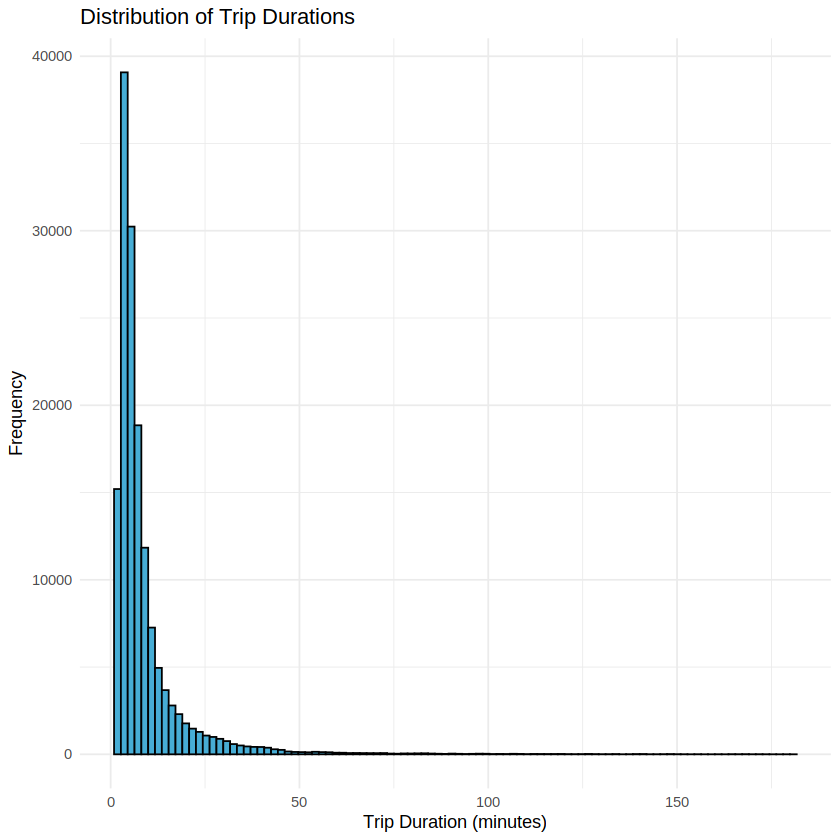

In [8]:
ggplot(data[data$tripduration <= 3 * 60 * 60, ], aes(x = tripduration / 60)) +
  geom_histogram(bins = 100, fill = "#47add5", color = "black") +
  labs(title = "Distribution of Trip Durations",
       x = "Trip Duration (minutes)",
       y = "Frequency") +
  theme_minimal()

### 5\. Plot the monthly average trip duration.

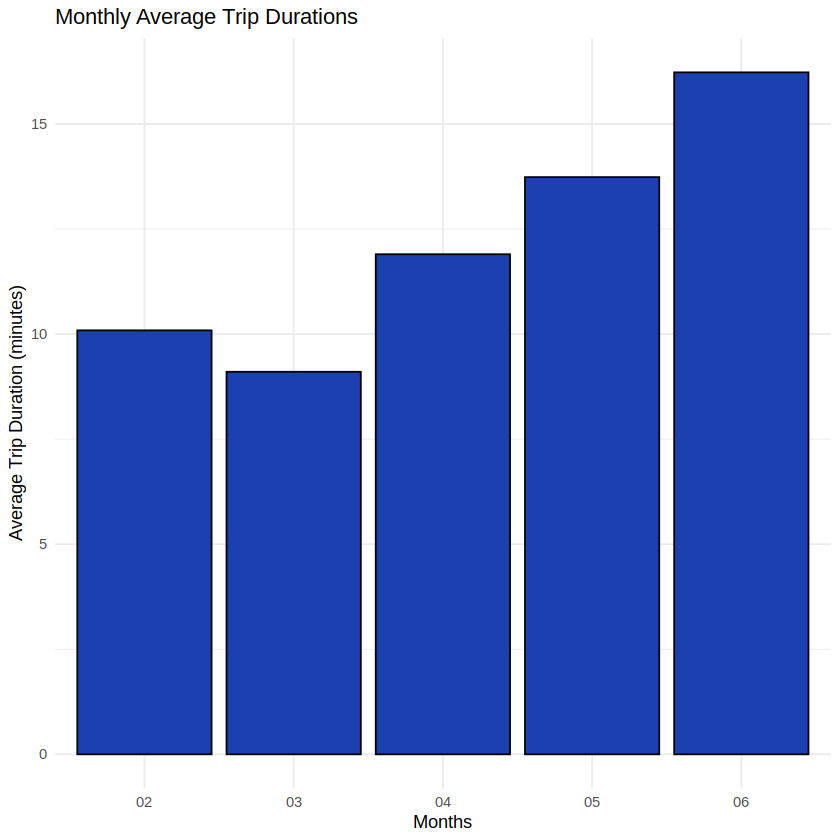

In [9]:
data$months <- format(as.Date(data$starttime), "%m")

mean_per_month <- data %>%
  group_by(months) %>%
  summarise(mean_tripduration = mean(tripduration / 60))

ggplot(mean_per_month, aes(x = months,
                           y = mean_tripduration)) +
  geom_bar(stat = "identity", fill = "#1b40b0", color = "black") +
  labs(title = "Monthly Average Trip Durations",
       x = "Months",
       y = "Average Trip Duration (minutes)") +
  theme_minimal()

### 6\.1 Plot the number of rides per day.

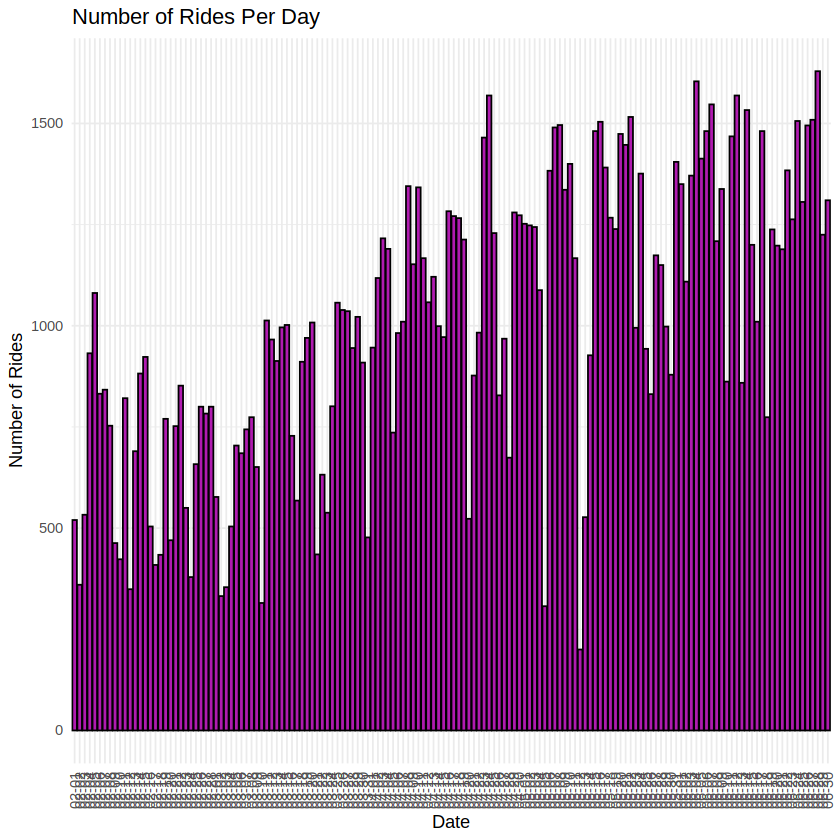

In [10]:
data$days <- format(as.Date(data$starttime), "%m-%d")
rides_per_day <- data %>%
  group_by(days) %>%
  summarise(number_of_rides = n())

ggplot(rides_per_day, aes(x = days, y = number_of_rides)) +
  geom_bar(stat = "identity", fill = "#b01bb0", color = "black") +
  labs(title = "Number of Rides Per Day",
       x = "Date",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 6\.2 Plot the hourly distribution on weekdays and on weekends.

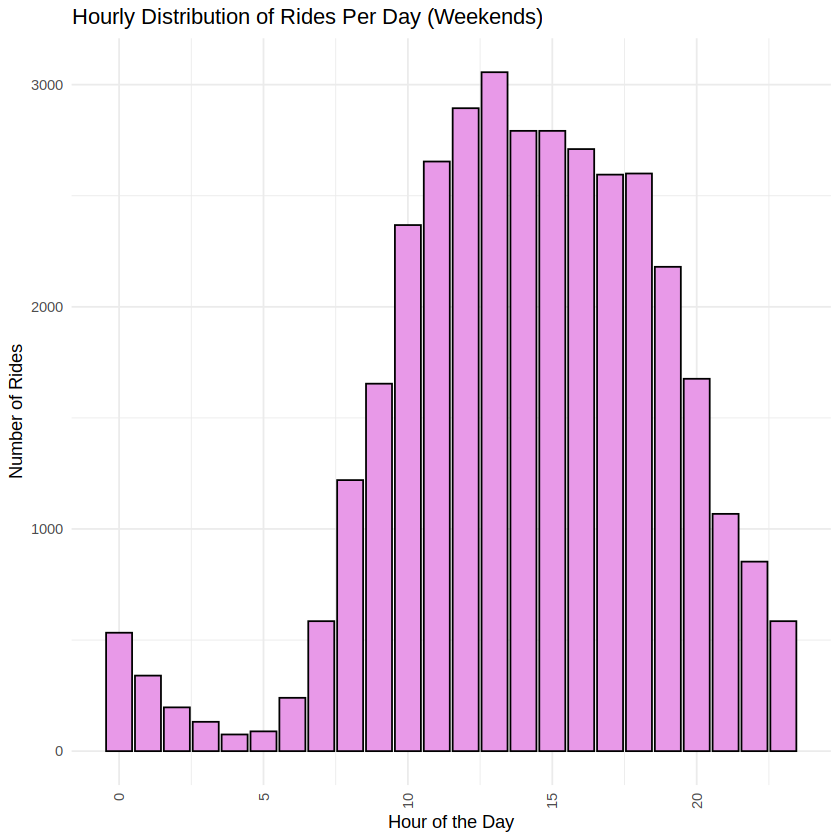

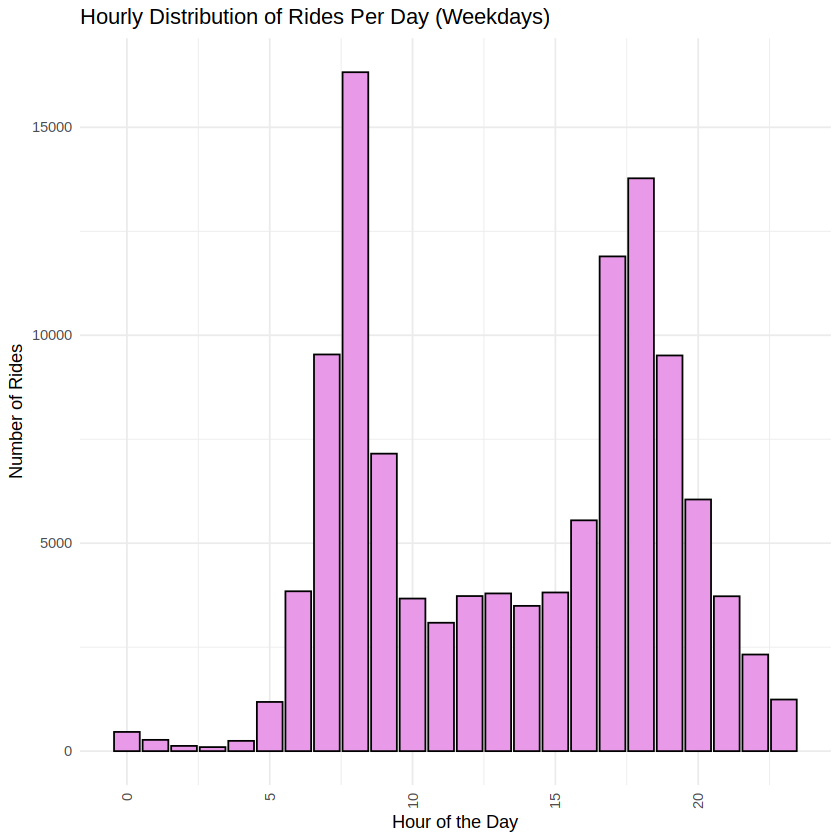

In [11]:
data$weekdays <- weekdays(as.Date(data$starttime))
data$weekend <- data$weekdays %in% c("Saturday", "Sunday")

weekend_rides <- as.numeric(format(as.POSIXct(data$starttime[data$weekend
                                                             == TRUE]), "%H"))
weekdays_rides <- as.numeric(format(as.POSIXct(data$starttime[data$weekend
                                                              == FALSE]), "%H"))

ggplot(data.frame(weekend_rides), aes(x = weekend_rides)) +
  geom_bar(stat = "count", fill = "#e899e8", color = "black") +
  labs(title = "Hourly Distribution of Rides Per Day (Weekends)",
       x = "Hour of the Day",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

ggplot(data.frame(weekdays_rides), aes(x = weekdays_rides)) +
  geom_bar(stat = "count", fill = "#e899e8", color = "black") +
  labs(title = "Hourly Distribution of Rides Per Day (Weekdays)",
       x = "Hour of the Day",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 6\.3 Plot again the average hourly distribution on weekdays but separating customer and subscriber users.

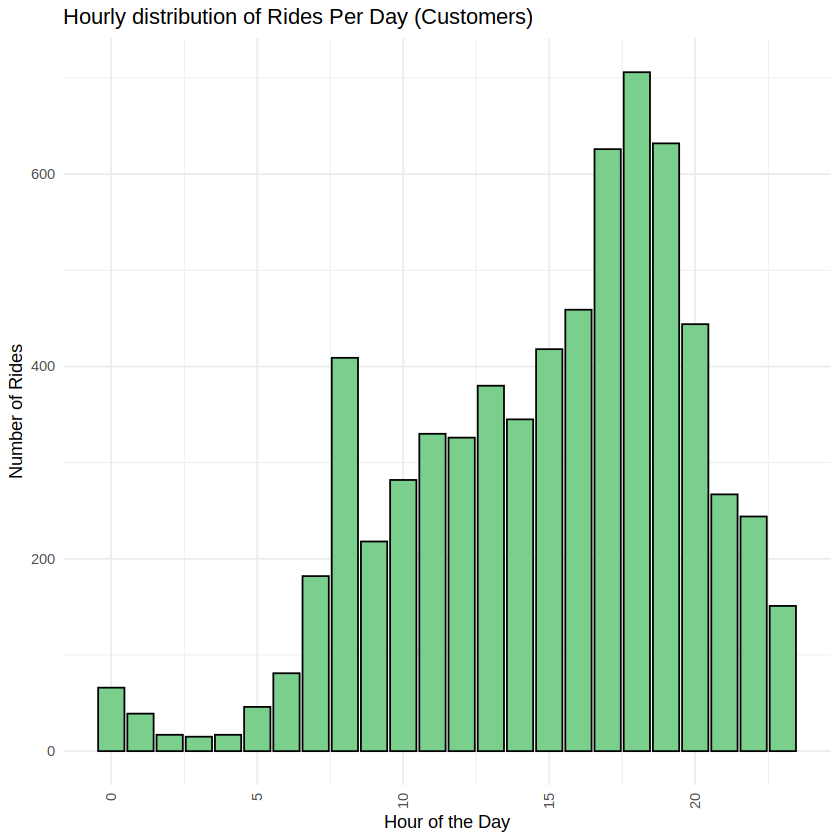

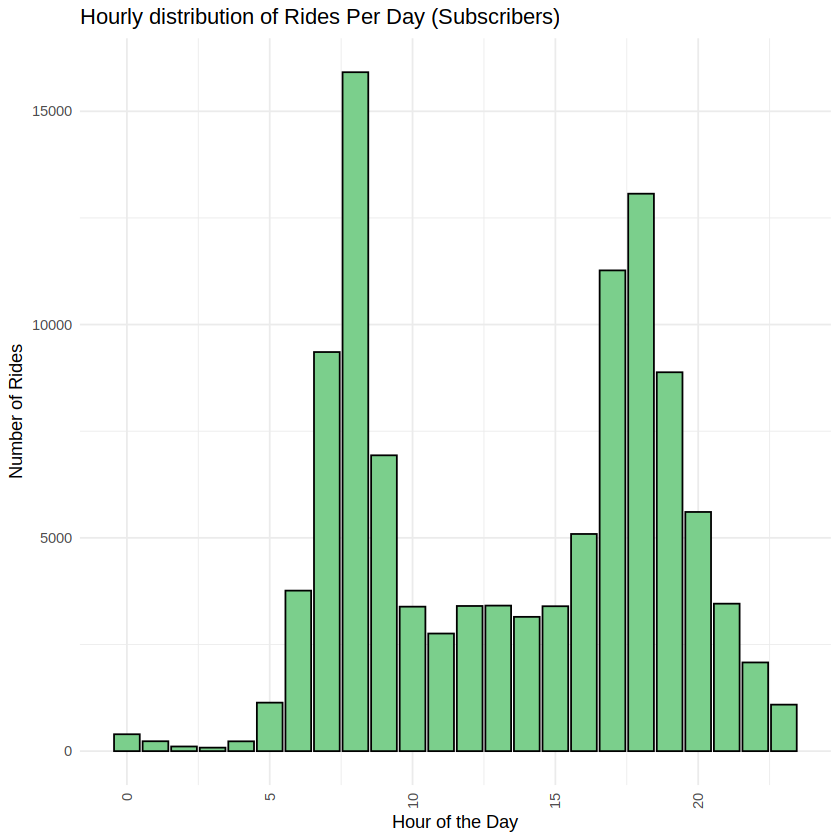

In [12]:
data$starttime <- as.POSIXct(data$starttime)

cust_weekdays_rides <- data[data$usertype == "Customer" &
                              data$weekend == FALSE, ]
sub_weekdays_rides <- data[data$usertype == "Subscriber" &
                             data$weekend == FALSE, ]

weekdays_rides_c <- as.numeric(format(cust_weekdays_rides$starttime, "%H"))
weekdays_rides_s <- as.numeric(format(sub_weekdays_rides$starttime, "%H"))

ggplot(data.frame(weekdays_rides_c), aes(x = weekdays_rides_c)) +
  geom_bar(stat = "count", fill = "#7bcf8c", color = "black") +
  labs(title = "Hourly distribution of Rides Per Day (Customers)",
       x = "Hour of the Day",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

ggplot(data.frame(weekdays_rides_s), aes(x = weekdays_rides_s)) +
  geom_bar(stat = "count", fill = "#7bcf8c", color = "black") +
  labs(title = "Hourly distribution of Rides Per Day (Subscribers)",
       x = "Hour of the Day",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 7\.1 Using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discarding the trip lasting longer than 1 hour

In [13]:
data_less_than_one_hour <- data[data$tripduration < 60 * 60, ]

start_coords <- cbind(data_less_than_one_hour$start.station.longitude,
                      data_less_than_one_hour$start.station.latitude)
end_coords <- cbind(data_less_than_one_hour$end.station.longitude,
                    data_less_than_one_hour$end.station.latitude)

data_less_than_one_hour$speeds <- distHaversine(start_coords, end_coords) /
  data_less_than_one_hour$tripduration * 3.6

avg_speed <- mean(data_less_than_one_hour$speeds)

sprintf("Average speed (trips lasting less than 1 hour): %s km/h", avg_speed)

[1] "Average speed (trips lasting less than 1 hour): 9.24009722083186 km/h"

### 7\.2 Plot the average speed as a function of route length for the following group of distances d <500 m, 500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding trips longer than 1 hour.

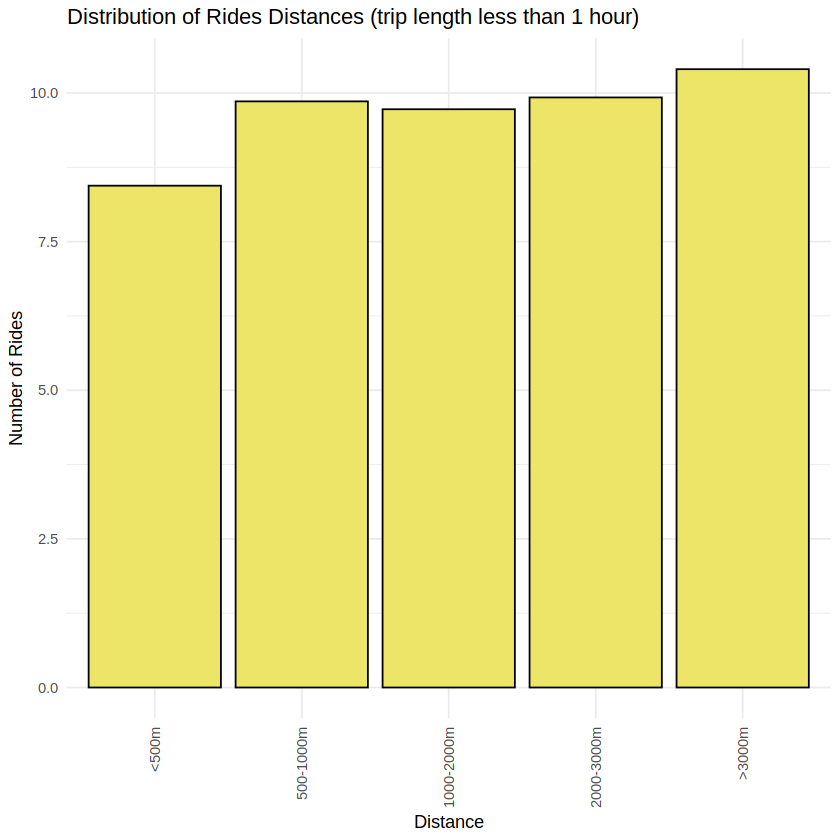

In [14]:
data_less_than_one_hour$dist_groups <- cut(distHaversine(start_coords,
                                                         end_coords),
                                           breaks = c(0, 500, 1000,
                                                      2000, 3000, Inf),
                                           labels = c("<500m", "500-1000m",
                                                      "1000-2000m",
                                                      "2000-3000m", ">3000m"))

mean_speeds <- aggregate(speeds ~ dist_groups, data = data_less_than_one_hour,
                         FUN = mean)

ggplot(data = mean_speeds, aes(x = dist_groups, y = speeds)) +
  geom_bar(stat = "identity", fill = "#ece567", color = "black") +
  labs(title = "Distribution of Rides Distances (trip length less than 1 hour)",
       x = "Distance",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 7\.3 Repeat the same graph, but show the results obtained separately for weekdays and weekends.

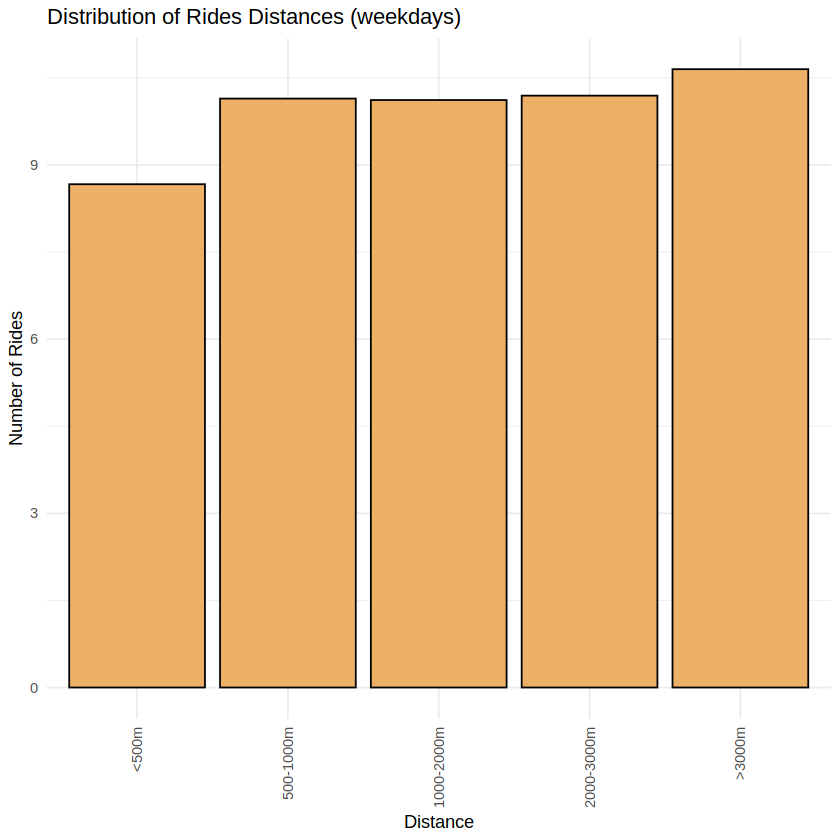

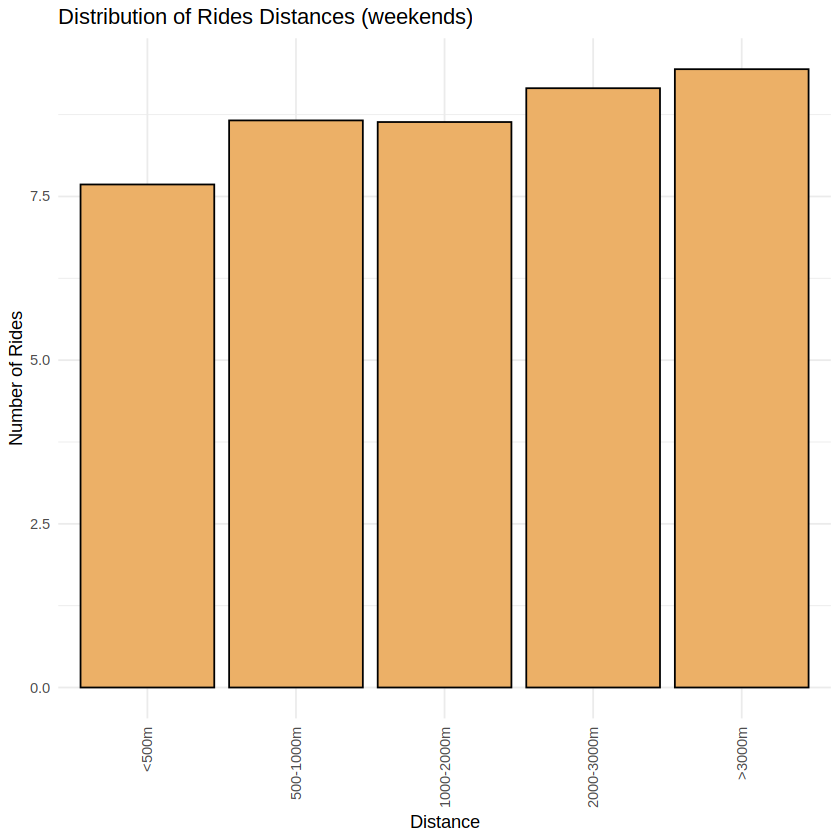

In [15]:
data_lt_one_hour_weekdays <- data_less_than_one_hour[data_less_than_one_hour$
                                                       weekend == FALSE, ]
data_lt_one_hour_weekends <- data_less_than_one_hour[data_less_than_one_hour$
                                                       weekend == TRUE, ]

mean_speeds_weekdays <- aggregate(speeds ~ dist_groups,
                                  data = data_lt_one_hour_weekdays, FUN = mean)
mean_speeds_weekends <- aggregate(speeds ~ dist_groups,
                                  data = data_lt_one_hour_weekends, FUN = mean)

ggplot(data = mean_speeds_weekdays, aes(x = dist_groups, y = speeds)) +
  geom_bar(stat = "identity", fill = "#ecb067", color = "black") +
  labs(title = "Distribution of Rides Distances (weekdays)",
       x = "Distance",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

ggplot(data = mean_speeds_weekends, aes(x = dist_groups, y = speeds)) +
  geom_bar(stat = "identity", fill = "#ecb067", color = "black") +
  labs(title = "Distribution of Rides Distances (weekends)",
       x = "Distance",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 8\.1 Find the most common start station and the least popular end station.

In [16]:
start_station_occ <- data %>%
  group_by(start.station.name) %>%
  summarise(occurrences = n()) %>%
  arrange(., desc(occurrences)) %>%
  rename(start_station = start.station.name)

end_station_occ <- data %>%
  group_by(end.station.name) %>%
  summarise(occurrences = n()) %>%
  arrange(., desc(occurrences)) %>%
  rename(end_station = end.station.name)

most_common_start_station <- start_station_occ[start_station_occ$occurrences ==
                                                 max(start_station_occ$
                                                       occurrences), ]
least_common_end_station <- end_station_occ[end_station_occ$occurrences ==
                                              min(end_station_occ$
                                                    occurrences), ]

most_common_start_station
least_common_end_station

start_station,occurrences
<chr>,<int>
Grove St PATH,17902


end_station,occurrences
<chr>,<int>
1 Ave & E 16 St,1
8 Ave & W 52 St,1
Broadway & W 56 St,1
E 33 St & 5 Ave,1
Norfolk St & Broome St,1
South St & Gouverneur Ln,1
Spruce St & Nassau St,1
W 15 St & 10 Ave,1
W 15 St & 6 Ave,1


### 8\.2 Show the distribution of start stations.

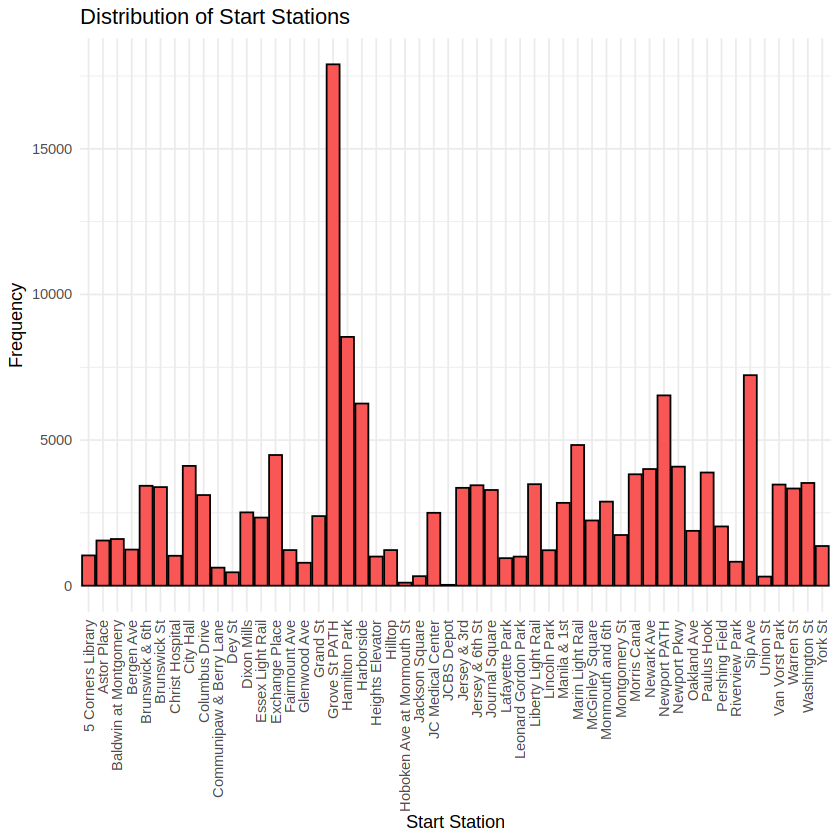

In [17]:
ggplot(data = start_station_occ, aes(x = start_station, y = occurrences)) +
  geom_bar(stat = "identity", fill = "#f85552fb", color = "black") +
  labs(title = "Distribution of Start Stations",
       x = "Start Station",
       y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

### 8\.3 Find the three most common routes (start and end station) and the three least popular ones.

In [18]:
routes <- data %>%
  group_by(start.station.name, end.station.name) %>%
  summarise(route_count = n(), .groups = "drop") %>%
  arrange(desc(route_count))

head(routes, 3)
tail(routes, 3)

start.station.name,end.station.name,route_count
<chr>,<chr>,<int>
Hamilton Park,Grove St PATH,3037
Grove St PATH,Hamilton Park,2318
Brunswick & 6th,Grove St PATH,1916


start.station.name,end.station.name,route_count
<chr>,<chr>,<int>
York St,Brunswick & 6th,1
York St,Communipaw & Berry Lane,1
York St,Lincoln Park,1


Actually there are more least popular routes (all with occurrencies 1), these are the three least popular following the alphabetical order of *start.station.name*.